In [85]:
import numpy as np
import pandas as pd
from enum import Enum
import random
import matplotlib.pyplot as plt

RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREEN = (0, 255, 0)
WHITE = (0, 0, 0)

class Label(Enum):
    DANGEROUS = 0
    SAFE = 1
    
    def __eq__(self, other):
        if isinstance(other, Label):
            return self.value == other.value
            
        return self.value == other

class ImageGenerator:
    """Generates N (M x M) images and writes to data"""
    def __init__(self, num_images, dimensions = 20, write_ = True):
        self.dimensions = dimensions
        # note: it doesnt actually generate N images and doesnt write to data yet

    def generate(self):
        """Generate a single image and label it appropriately"""
        n = self.dimensions
        image_data = np.full((n, n), BLACK, dtype = np.dtype("(3,)i4"))
        colors = [RED, BLUE, YELLOW, GREEN]

        # Keep track of rows/cols that can be used
        valid_rows = list(range(20))
        valid_cols = list(range(20))

        # 1  = Color Row
        # -1 = Color Col
        pointer = random.choice([1, -1])
        label = Label.SAFE
        yellow_placed = False

        while colors:
            # Select a unused color
            curr_color = random.choice(colors)
            colors.remove(curr_color)
            
            # Handle marking an image as DANGEROUS if red is placed before yellow
            yellow_placed = yellow_placed or curr_color == YELLOW
            if curr_color == RED and not yellow_placed:
                label = Label.DANGEROUS

            if pointer == 1:
                rand_idx = random.choice(valid_rows)
                valid_rows.remove(rand_idx)
                self.color_row(rand_idx, curr_color, image_data)
            else:
                rand_idx = random.choice(valid_cols)
                valid_cols.remove(rand_idx)
                self.color_column(rand_idx, curr_color, image_data)
                
            pointer *= -1

        return Image(image_data, label)
            

    def color_column(self, col, color, arr):
        """Color the given column of the image with the provided color"""
        n = self.dimensions
        for i in range(n):
            arr[i][col] = color

    def color_row(self, row, color, arr):
        """Color the given row of the image with the provided color"""
        n = self.dimensions
        for i in range(n):
            arr[row][i] = color
      

class Image:
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def is_safe(self):
        return self.label == Label.SAFE

    def display(self):
        plt.imshow(self.data)
        plt.axis("off")
        plt.show()

Label.SAFE


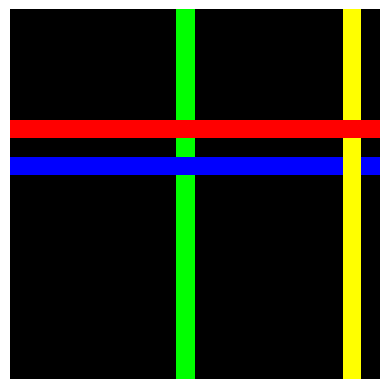

Label.DANGEROUS


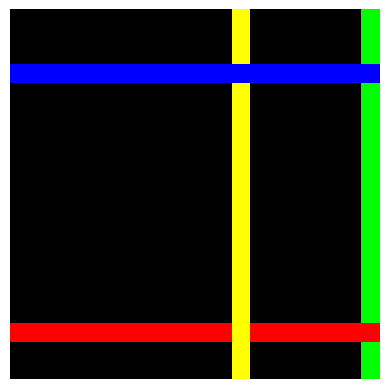

Label.DANGEROUS


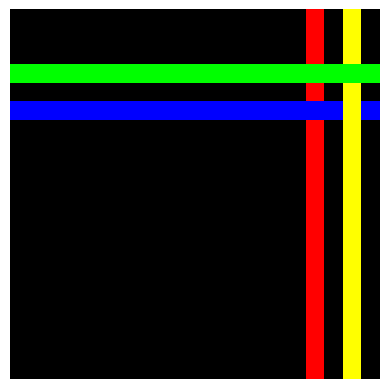

Label.DANGEROUS


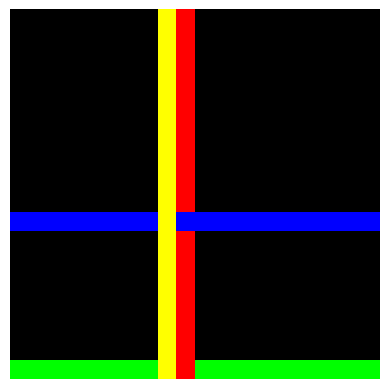

Label.SAFE


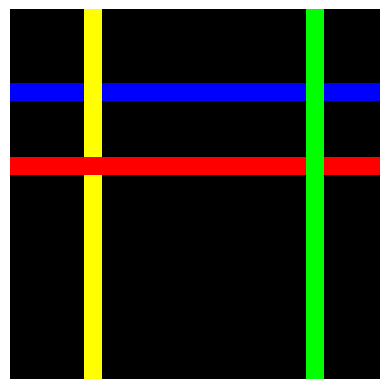

In [86]:
img_gen = ImageGenerator(1)
for i in range(5):
    img = img_gen.generate()
    print(img.label)
    img.display()